# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "ee7010297d9d0422e4631321591f56d4"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}id={city}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:   
        # Make the API request
        response = requests.get(city_url)
        
        # Raise an exception for bad responses
        response.raise_for_status()
        
        # Parse the JSON and retrieve data
        city_weather = response.json()
  

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
City not found. Skipping...
Processing Record 2 of Set 1 | grytviken
City not found. Skipping...
Processing Record 3 of Set 1 | kailua-kona
City not found. Skipping...
Processing Record 4 of Set 1 | ribeira grande
City not found. Skipping...
Processing Record 5 of Set 1 | luderitz
City not found. Skipping...
Processing Record 6 of Set 1 | tromso
City not found. Skipping...
Processing Record 7 of Set 1 | quepos
City not found. Skipping...
Processing Record 8 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 9 of Set 1 | utrik
City not found. Skipping...
Processing Record 10 of Set 1 | sur
City not found. Skipping...
Processing Record 11 of Set 1 | adamstown
City not found. Skipping...
Processing Record 12 of Set 1 | la passe
City not found. Skipping...
Processing Record 13 of Set 1 | thompson
City not found. Skipping...
Processing Record 14 of Set 1 | college
Cit

In [28]:
file_path = "../output_data/cities.csv"

# Read the CSV file into a DataFrame
city_data_df = pd.read_csv(file_path)

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.read_csv(file_path)
# Drop unnecessary columns
columns_to_drop = [col for col in city_data_df.columns if 'City_ID' in col or 'Unnamed' in col]
city_data_df.drop(columns=columns_to_drop, inplace=True)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [34]:
# Display sample data
display(city_data_df)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
...,...,...,...,...,...,...,...,...,...
572,sovetskiy,61.3614,63.5842,3.93,96,100,3.71,RU,1666108564
573,tatarsk,55.2190,75.9828,3.78,89,84,2.63,RU,1666108564
574,canchungo,12.0672,-16.0333,35.07,61,67,2.91,GW,1666108565
575,iquique,-20.2208,-70.1431,17.02,68,6,3.50,CL,1666108566


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

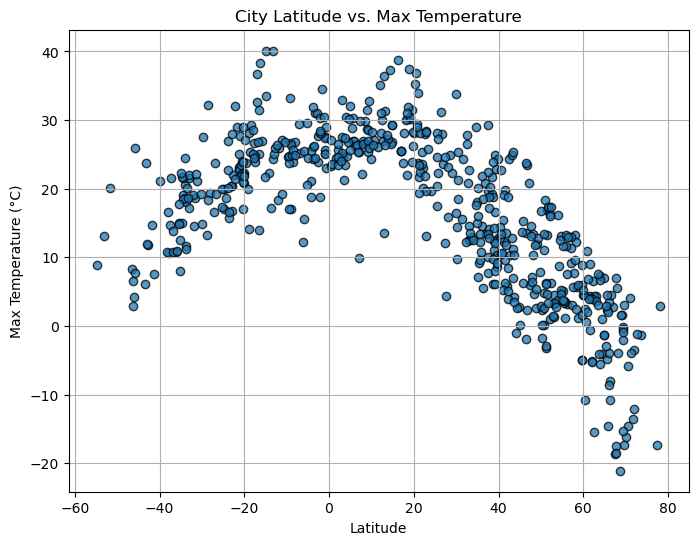

<Figure size 640x480 with 0 Axes>

In [41]:
# Build scatter plot for latitude vs. temperature

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.75)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

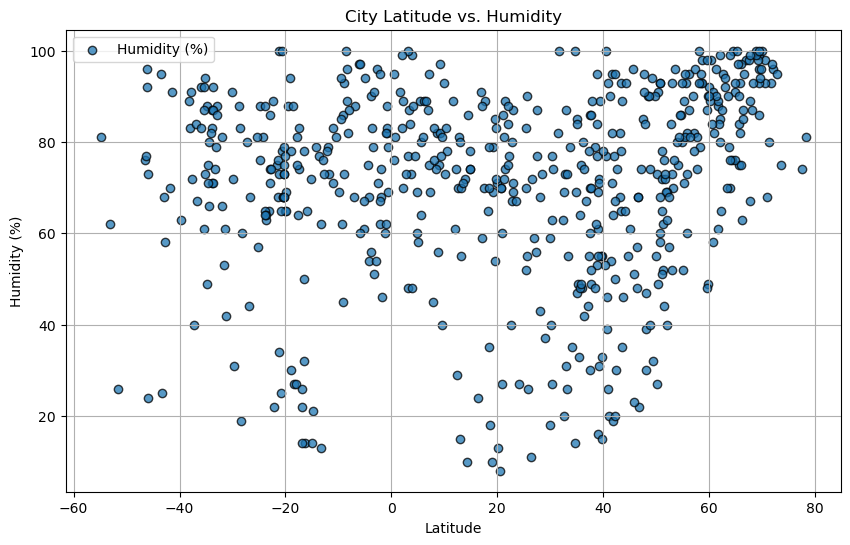

In [44]:
# Build the scatter plots for latitude vs. humidity
lats = city_data_df["Lat"]
humidities = city_data_df["Humidity"]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(lats, humidities, edgecolor='black', linewidths=1, marker='o', alpha=0.75, label="Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

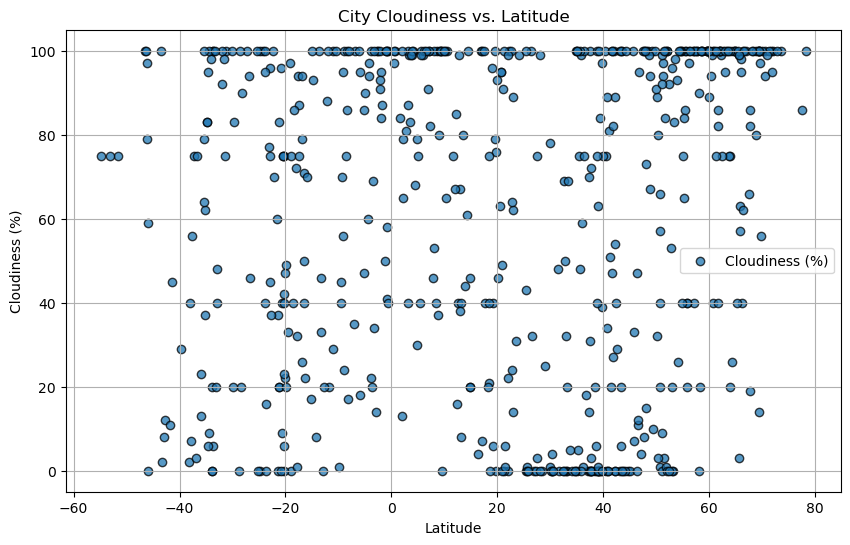

In [47]:
# Build the scatter plots for latitude vs. cloudiness
lats = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

plt.figure(figsize=(10, 6))
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.75, label="Cloudiness (%)")
plt.title("City Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

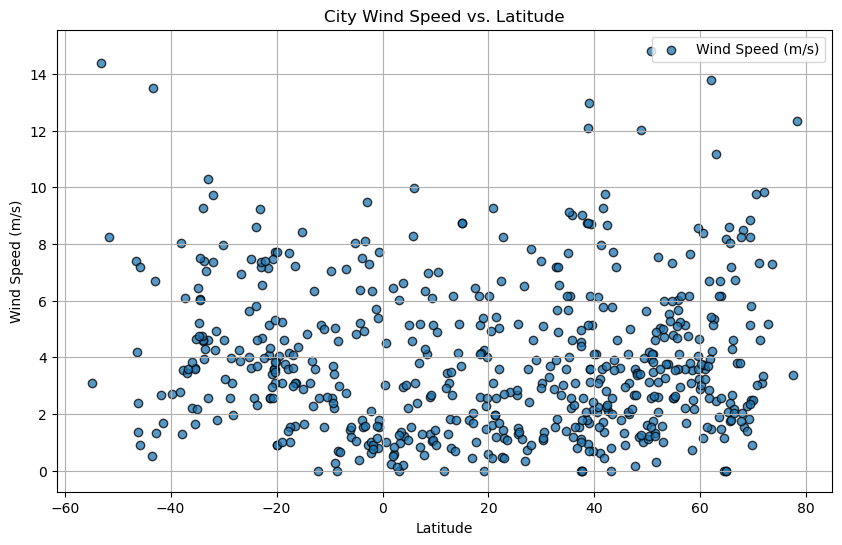

In [50]:
# Build the scatter plots for latitude vs. wind speed
lats = city_data_df["Lat"]
wind_speeds = city_data_df["Wind Speed"]

plt.figure(figsize=(10, 6))
plt.scatter(lats, wind_speeds, edgecolor='black', linewidths=1, marker='o', alpha=0.75, label="Wind Speed (m/s)")
plt.title("City Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title, save_path=None):

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate the regression line
    regression_line = slope * x + intercept

    # Plot data points
    plt.scatter(x, y, color='blue', label='Data')

    # Plot regression line
    plt.plot(x, regression_line, color='red', label='Linear Regression')

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Add legend
    plt.legend()

    # Save or show plot
    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

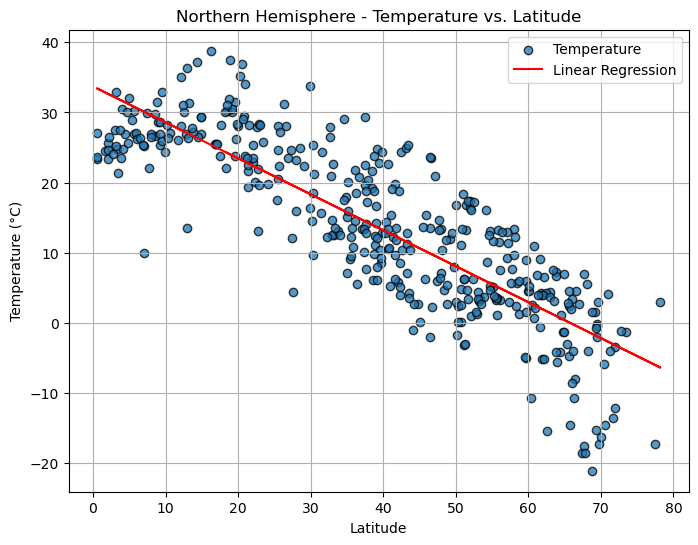

In [60]:
# Linear regression on Northern Hemisphere
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]
northern_lats = northern_hemisphere_df["Lat"]
northern_temps = northern_hemisphere_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_lats, northern_temps)

# Calculate the regression line
regression_line = slope * northern_lats + intercept

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(northern_lats, northern_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.75, label="Temperature")
plt.plot(northern_lats, regression_line, color='red', label='Linear Regression')
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()

# Show plot
plt.show()

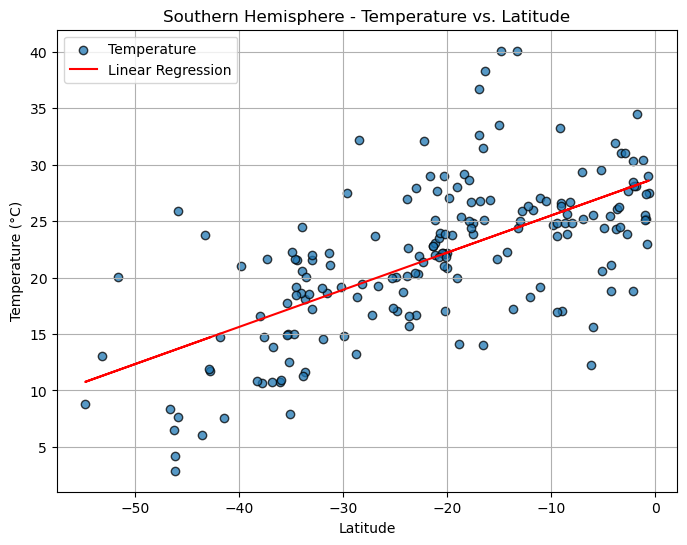

In [62]:
# Linear regression on Southern Hemisphere
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]
southern_lats = southern_hemisphere_df["Lat"]
southern_temps = southern_hemisphere_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_lats, southern_temps)

# Calculate the regression line
regression_line = slope * southern_lats + intercept

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(southern_lats, southern_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.75, label="Temperature")
plt.plot(southern_lats, regression_line, color='red', label='Linear Regression')
plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

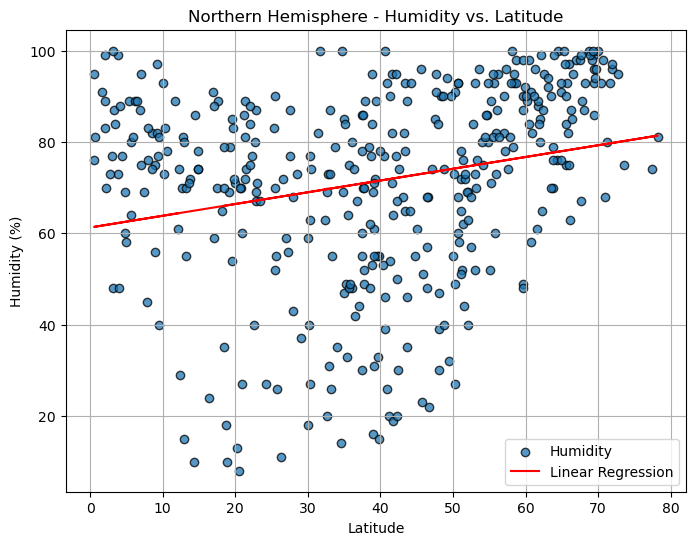

In [67]:
# Northern Hemisphere
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]
northern_lats = northern_hemisphere_df["Lat"]
northern_humidity = northern_hemisphere_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_lats, northern_humidity)

# Calculate the regression line
regression_line = slope * northern_lats + intercept

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(northern_lats, northern_humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.75, label="Humidity")
plt.plot(northern_lats, regression_line, color='red', label='Linear Regression')
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.legend()

# Show plot
plt.show()

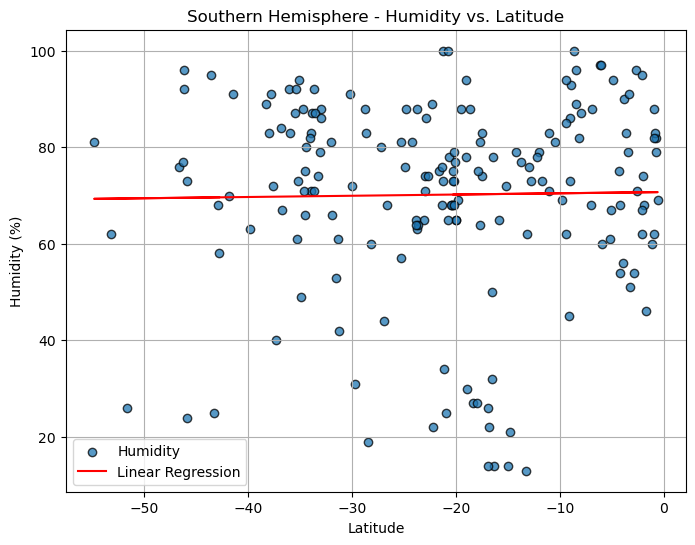

In [69]:
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]
southern_lats = southern_hemisphere_df["Lat"]
southern_humidity = southern_hemisphere_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_lats, southern_humidity)

# Calculate the regression line
regression_line = slope * southern_lats + intercept

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(southern_lats, southern_humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.75, label="Humidity")
plt.plot(southern_lats, regression_line, color='red', label='Linear Regression')
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.legend()

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

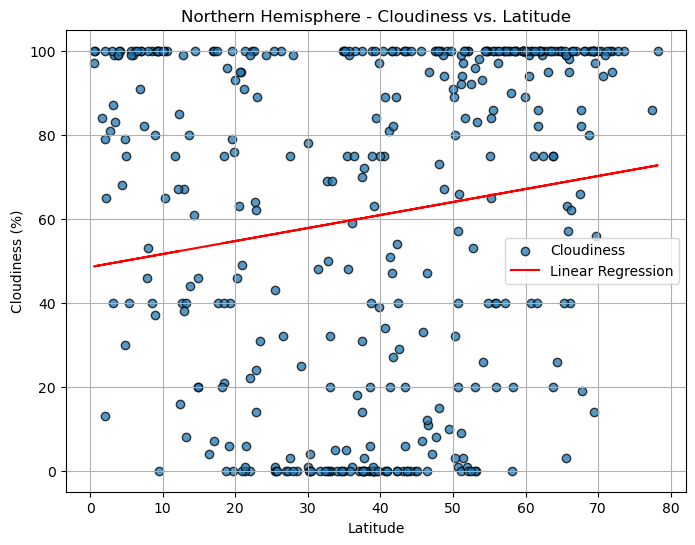

In [73]:
# Northern Hemisphere
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]
northern_lats = northern_hemisphere_df["Lat"]
northern_cloudiness = northern_hemisphere_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_lats, northern_cloudiness)

# Calculate the regression line
regression_line = slope * northern_lats + intercept

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(northern_lats, northern_cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.75, label="Cloudiness")
plt.plot(northern_lats, regression_line, color='red', label='Linear Regression')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.legend()

# Show plot
plt.show()

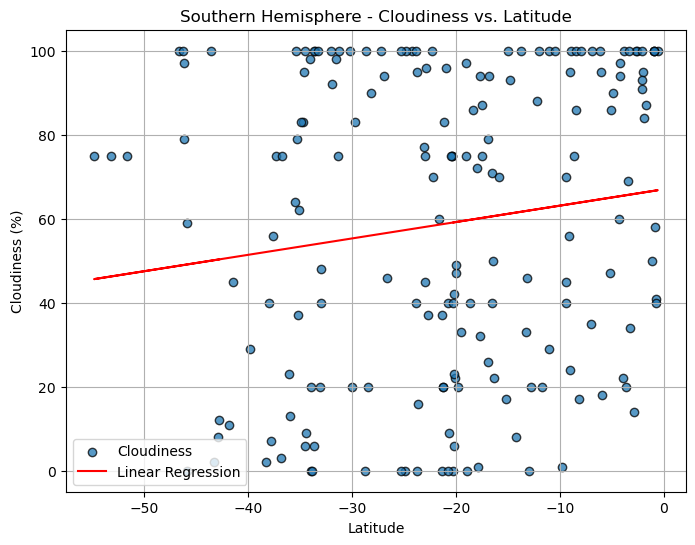

In [75]:
# Southern Hemisphere
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]
southern_lats = southern_hemisphere_df["Lat"]
southern_cloudiness = southern_hemisphere_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_lats, southern_cloudiness)

# Calculate the regression line
regression_line = slope * southern_lats + intercept

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(southern_lats, southern_cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.75, label="Cloudiness")
plt.plot(southern_lats, regression_line, color='red', label='Linear Regression')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.legend()

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

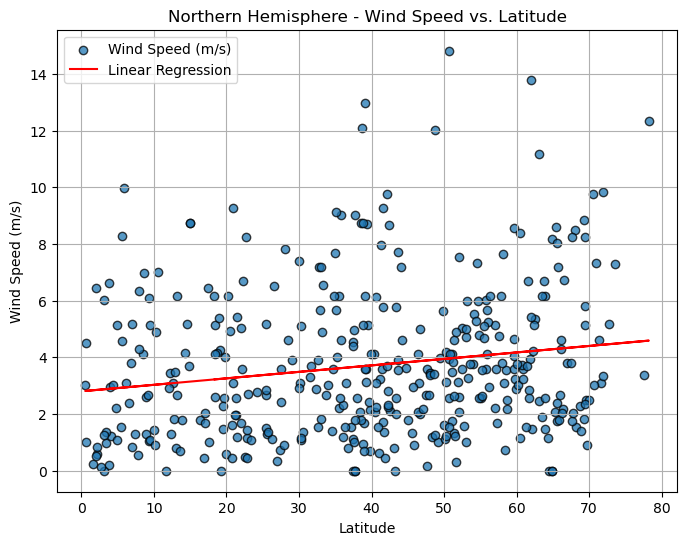

In [79]:
# Northern Hemisphere
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]
northern_lats = northern_hemisphere_df["Lat"]
northern_wind_speeds = northern_hemisphere_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_lats, northern_wind_speeds)

# Calculate the regression line
regression_line = slope * northern_lats + intercept

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(northern_lats, northern_wind_speeds, edgecolor='black', linewidths=1, marker='o', alpha=0.75, label="Wind Speed (m/s)")
plt.plot(northern_lats, regression_line, color='red', label='Linear Regression')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.legend()

# Show plot
plt.show()

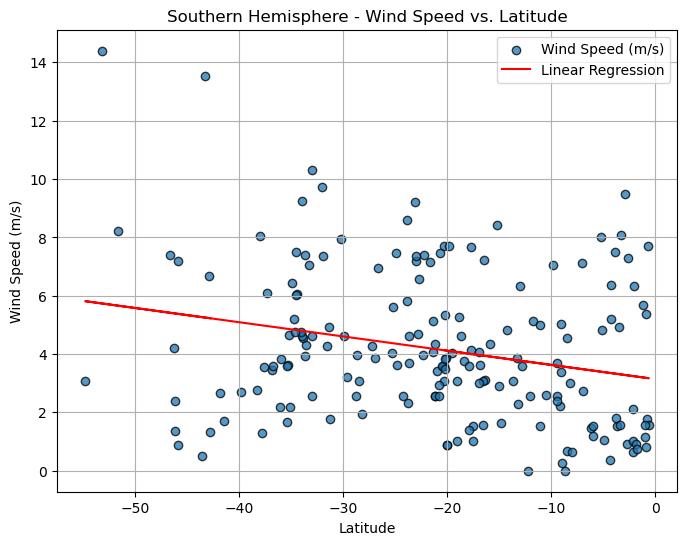

In [81]:
# Southern Hemisphere
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]
southern_lats = southern_hemisphere_df["Lat"]
southern_wind_speeds = southern_hemisphere_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_lats, southern_wind_speeds)

# Calculate the regression line
regression_line = slope * southern_lats + intercept

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(southern_lats, southern_wind_speeds, edgecolor='black', linewidths=1, marker='o', alpha=0.75, label="Wind Speed (m/s)")
plt.plot(southern_lats, regression_line, color='red', label='Linear Regression')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.legend()

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE